In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train),(X_test, Y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


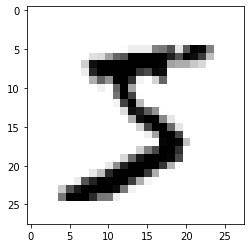

5


In [4]:
plt.figure()
plt.imshow(X_train[0],cmap=plt.cm.gray_r)
plt.show()
print(Y_train[0])

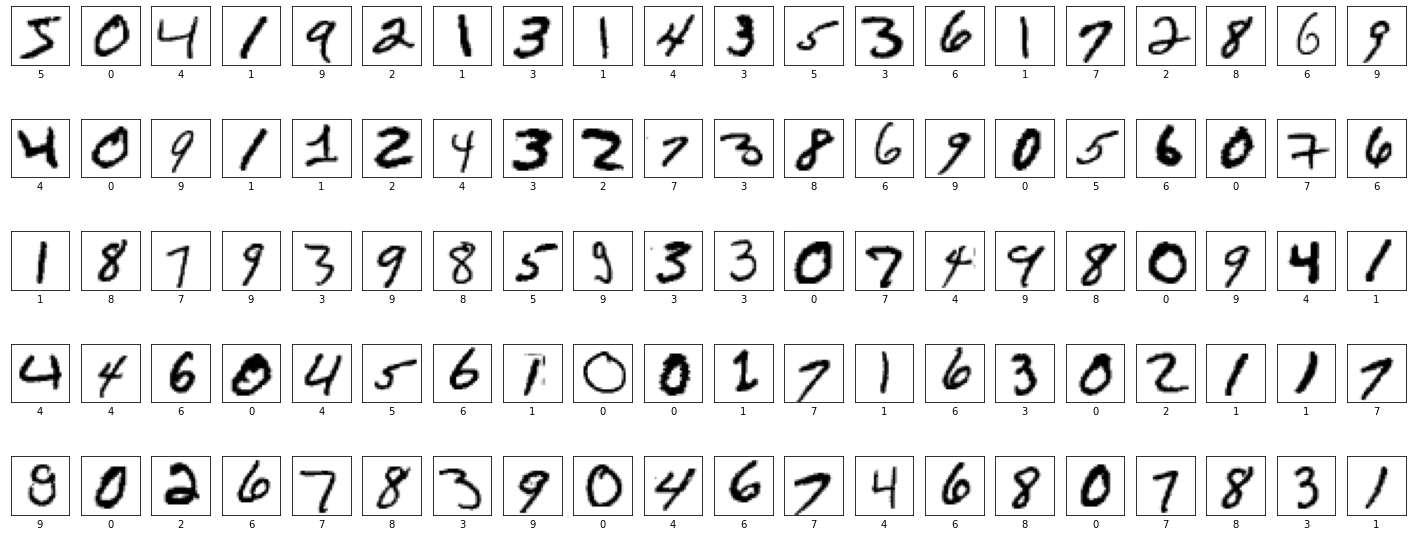

In [5]:
i=0
plt.figure(figsize=(25,10))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i])
    
plt.show()
    

In [6]:
X_train, X_test =X_train.astype('float32')/255, X_test.astype('float32')/255
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [7]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [8]:
print(X_test)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [9]:
model=tf.keras.Sequential(
[
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [11]:
h=model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.3, batch_size=64)

Epoch 1/20
657/657 [==============================] - 14s 18ms/step - loss: 0.2294 - accuracy: 0.9292 - val_loss: 0.0818 - val_accuracy: 0.9748
Epoch 2/20
657/657 [==============================] - 11s 17ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0702 - val_accuracy: 0.9794
Epoch 3/20
657/657 [==============================] - 12s 18ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0540 - val_accuracy: 0.9842
Epoch 4/20
657/657 [==============================] - 12s 18ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0549 - val_accuracy: 0.9830
Epoch 5/20
657/657 [==============================] - 12s 18ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 6/20
657/657 [==============================] - 12s 18ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 7/20
657/657 [==============================] - 12s 18ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0408 - val_accuracy:

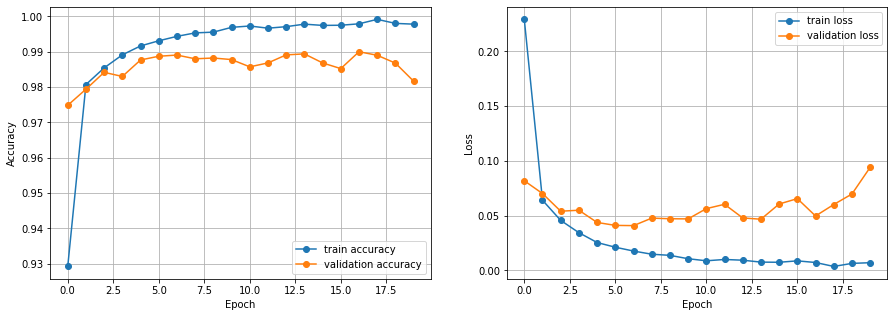

In [12]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss,test_acc = model.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 0.0975 - accuracy: 0.9804

Test Accuracy: 0.980400025844574

Test Loss: 0.0975005179643631


In [14]:
predictions = model.predict(X_test)

In [15]:
predictions[0]

array([3.2179383e-12, 3.2695734e-12, 1.4797648e-09, 5.9669758e-10,
       2.9495081e-15, 8.0452321e-14, 6.0154342e-19, 1.0000000e+00,
       1.5887217e-13, 1.6362445e-10], dtype=float32)

In [16]:
np.argmax(predictions[0])

7

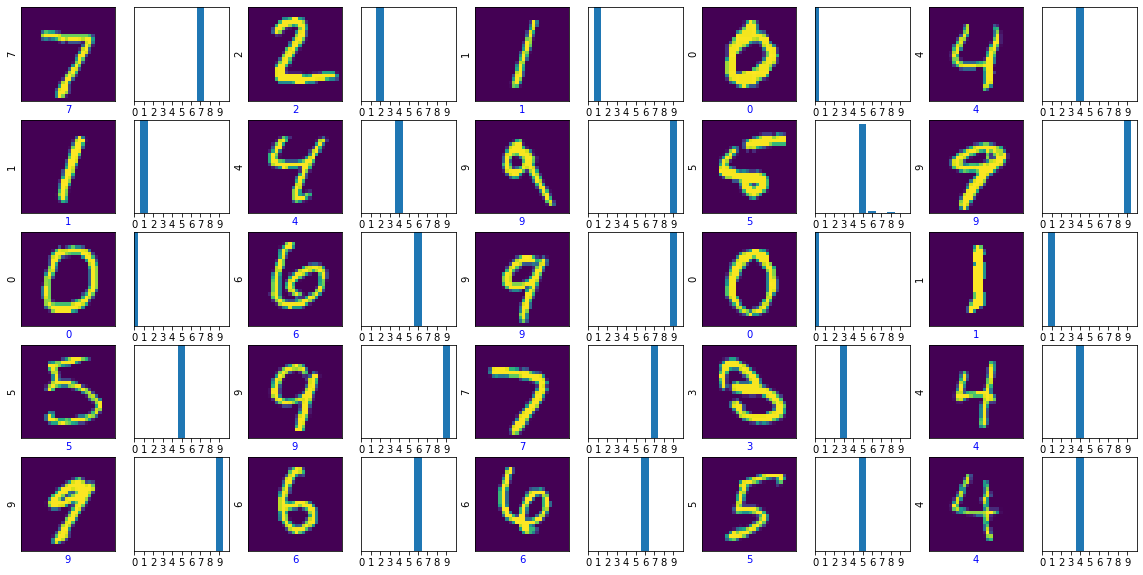

In [17]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(Y_test[i])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='b')
    else:
        plt.xlabel(np.argmax(predictions[i]), color='')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [18]:
model2=tf.keras.Sequential(
[
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [19]:
model2.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [20]:
h2=model2.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.3, batch_size=64)

Epoch 1/20
657/657 [==============================] - 54s 82ms/step - loss: 1.4511 - accuracy: 0.6167 - val_loss: 1.2679 - val_accuracy: 0.6163
Epoch 2/20
657/657 [==============================] - 53s 81ms/step - loss: 0.3331 - accuracy: 0.8994 - val_loss: 0.2389 - val_accuracy: 0.9261
Epoch 3/20
657/657 [==============================] - 53s 81ms/step - loss: 0.2054 - accuracy: 0.9378 - val_loss: 0.1927 - val_accuracy: 0.9406
Epoch 4/20
657/657 [==============================] - 53s 81ms/step - loss: 0.1602 - accuracy: 0.9518 - val_loss: 0.1324 - val_accuracy: 0.9601
Epoch 5/20
657/657 [==============================] - 53s 81ms/step - loss: 0.1298 - accuracy: 0.9612 - val_loss: 0.1238 - val_accuracy: 0.9620
Epoch 6/20
657/657 [==============================] - 53s 81ms/step - loss: 0.1145 - accuracy: 0.9656 - val_loss: 0.1078 - val_accuracy: 0.9671
Epoch 7/20
657/657 [==============================] - 53s 81ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.2397 - val_accuracy:

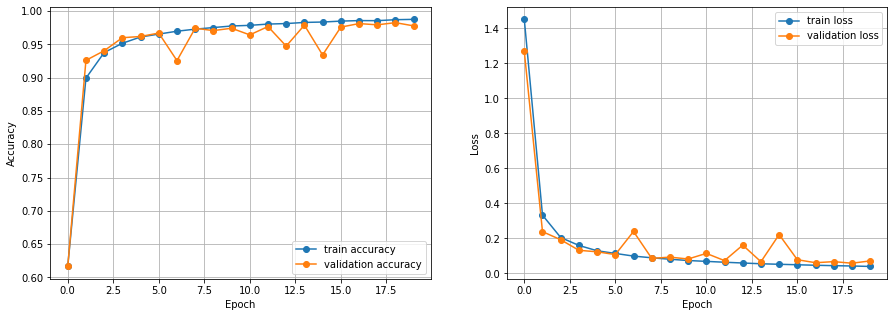

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss,test_acc = model2.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 0.0622 - accuracy: 0.9816

Test Accuracy: 0.9815999865531921

Test Loss: 0.06224692240357399


In [23]:
model3=tf.keras.Sequential(
[
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [24]:
model3.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [25]:
h3=model3.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.3, batch_size=64)

Epoch 1/20
657/657 [==============================] - 56s 84ms/step - loss: 0.2342 - accuracy: 0.9260 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 2/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 3/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0490 - val_accuracy: 0.9861
Epoch 4/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0453 - val_accuracy: 0.9876
Epoch 5/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0775 - val_accuracy: 0.9823
Epoch 6/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0598 - val_accuracy: 0.9857
Epoch 7/20
657/657 [==============================] - 55s 83ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0470 - val_accuracy:

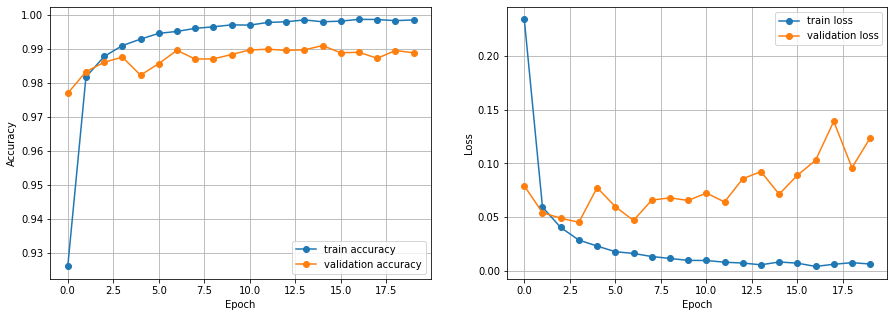

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
test_loss,test_acc = model3.evaluate (X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 0.0929 - accuracy: 0.9916

Test Accuracy: 0.991599977016449

Test Loss: 0.0929453894495964
